# Working with structured data in Python using Pandas

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series
([1, 3, 5, np.nan, 6, 8])
ss = pd.Series


In [3]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
numbers = np.random.randn(6, 4)
numbers

array([[ 0.33945981, -0.27801997,  0.85455746,  1.51443354],
       [ 0.24153686,  1.06512091,  0.03230489, -0.22435629],
       [ 1.81163385, -0.24871664, -0.03510522,  0.52280342],
       [ 1.12883494, -1.45671393, -0.5633226 ,  0.0875287 ],
       [-0.27140267, -0.95203812, -0.88925979,  0.43698007],
       [-1.21298389,  0.37432186,  0.06759163,  0.67701942]])

In [5]:
df1 = pd.DataFrame(numbers, index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2020-01-01,0.339460,-0.278020,0.854557,1.514434
2020-01-02,0.241537,1.065121,0.032305,-0.224356
2020-01-03,1.811634,-0.248717,-0.035105,0.522803
2020-01-04,1.128835,-1.456714,-0.563323,0.087529
2020-01-05,-0.271403,-0.952038,-0.889260,0.436980
2020-01-06,-1.212984,0.374322,0.067592,0.677019


In [6]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

Or create a DataFrame by combining the above in one command:

In [7]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Use `type()` to check the data type of each variable. Below `print` is used to display the data type of all of them used so far:

In [8]:
print('Data type of s is '+str(type(s)))
print('Data type of s is '+str(type(dates)))
print('Data type of s is '+str(type(numbers)))
print('Data type of df is '+str(type(df1)))

Data type of s is <class 'type'>
Data type of s is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data type of s is <class 'numpy.ndarray'>
Data type of df is <class 'pandas.core.frame.DataFrame'>


<a id="data"></a>
## Loading data 



### Load our data as a pandas data frame

In [9]:
# Place cursor below and insert the Pandas DataFrame for the Insurance Expense data
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_7f9f223fb97c47b1825f74f69691ee01 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9kL9FeL6AA8jD4h62vexXBPE0D15i4H6I-EgkuJkzcRb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7f9f223fb97c47b1825f74f69691ee01)

body = client_7f9f223fb97c47b1825f74f69691ee01.get_object(Bucket='jumpstartyourjourney-donotdelete-pr-uxuydsi0s4ynks',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Update the variable for our Pandas dataframe

In [10]:
# Replace data_df_1 with the variable name generated above.
df = df_data_2

## Exploring Data

In [11]:
df.shape

(1338, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
len(df)

1338

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [16]:
list(df)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [17]:
all_columns         = list(df)

In [18]:
numerical_columns     = list(df.select_dtypes(include=['float64','int64']).columns)

print('Numerical columns : ')
print(numerical_columns)


Numerical columns : 
['age', 'bmi', 'children', 'expenses']


and in the cell below, we identify categorical columns from the dataset. 

In [19]:
categorical_columns = [x for x in all_columns if x not in numerical_columns ]

print('Categorical columns : ')
print(categorical_columns)

Categorical columns : 
['sex', 'smoker', 'region']


In [20]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [21]:
df.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.92],
       [18, 'male', 33.8, ..., 'no', 'southeast', 1725.55],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.46],
       ...,
       [18, 'female', 36.9, ..., 'no', 'southeast', 1629.83],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.95],
       [61, 'female', 29.1, ..., 'yes', 'northwest', 29141.36]],
      dtype=object)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [24]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


<a id="cleaning"></a>
## Cleaning Data

In [25]:
premium_df = df.copy()

In [26]:
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Adding and deleting columns

In [27]:
premium_df['new'] = 1
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses,new
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


In [28]:
premium_df = premium_df.drop(columns='new')
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Rename columns

In [29]:
print("Column names before rename : ", premium_df.columns)

Column names before rename :  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


<a id="Renaming"></a>

You can change names of columns using `rename`:

In [30]:
premium_df.rename(columns={'sex':'gender'},
                 inplace=True)

In [31]:
print("Column names after rename : ", premium_df.columns)

Column names after rename :  Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [32]:
premium_df.head()

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Further Data Cleaning

In [33]:
premium_df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [34]:
premium_df.isna().any()

age         False
gender      False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [35]:
premium_df_describe = premium_df.describe()

In [36]:
premium_df_describe

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [37]:
print(premium_df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']



## Analyzing data 

In [38]:
premium_smoker_df = premium_df[['smoker', 'expenses']]
premium_smoker_df.head()

,smoker,expenses
0,yes,16884.92
1,no,1725.55
2,no,4449.46
3,no,21984.47
4,no,3866.86


### Get smoker counts

In [39]:
premium_smoker_df['smoker'] == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [40]:
print(len(premium_smoker_df[premium_smoker_df['smoker'] == 'yes']))

274


In [41]:
print(len(premium_smoker_df[premium_smoker_df['smoker'] == 'no']))

1064


In [42]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Visualize smoker data

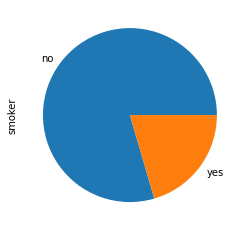

In [43]:
df.smoker.value_counts().plot(kind="pie")

<a id="grouping"></a>
### *smoker* vs *expenses* statistics 

In [44]:
df.groupby(['smoker']).expenses.describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


### *smoker* vs *age* statistics

In [45]:
df.groupby("smoker").age.mean()

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

### Correlation between features

In [46]:
df[['age', 'sex','bmi', 'children', 'smoker', 'region', 'expenses']].corr(method='pearson')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000
